# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = simulation.SimulationResult()
simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch power watts: 1.790e-01
emitter area m^2: 1.000e-06
batch radiosity w/m^2: 1.790e+05
photon batch energy joules: 1.790e-04
photon batch powe

LED emitted photons: 400000000


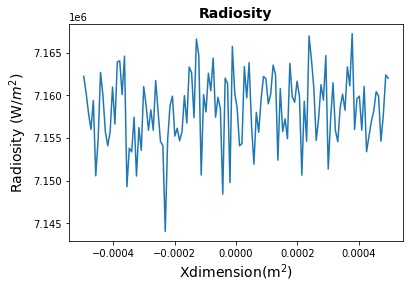

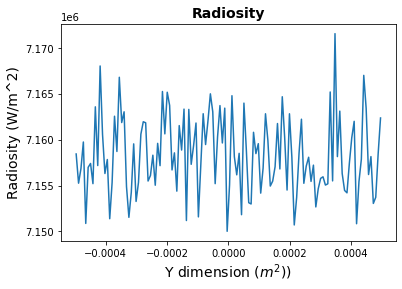

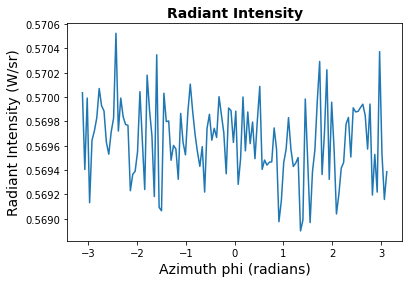

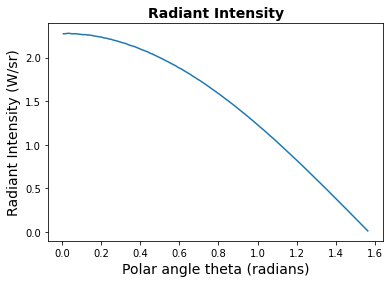

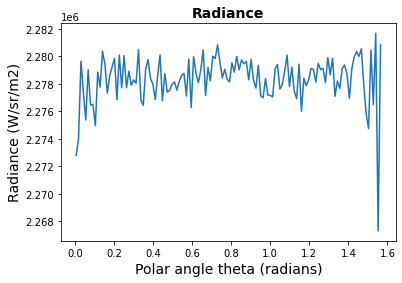

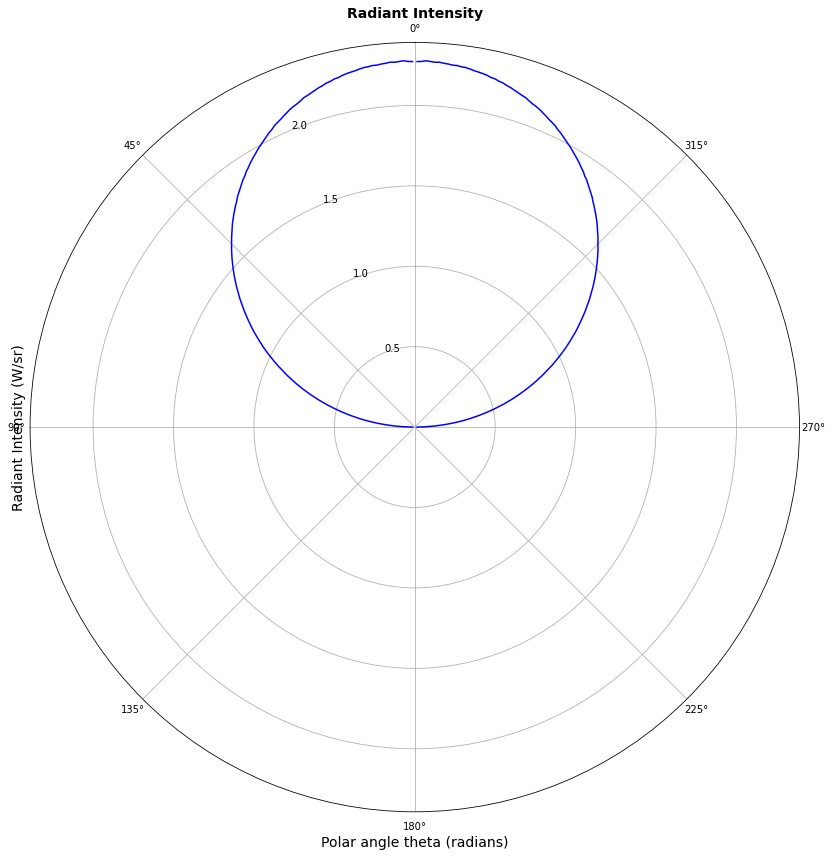

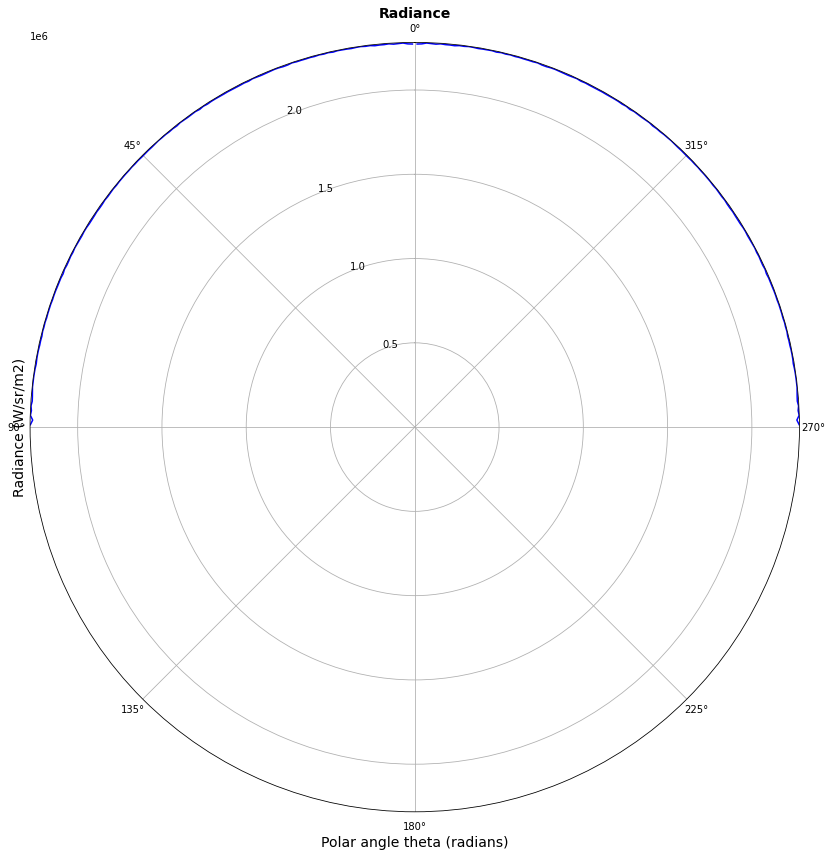

Output()

In [3]:
print(f"LED emitted photons: {results._source_stage._photons_size}")
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stage_3d(results._source_stage)

diffuser incident photons: 337990526


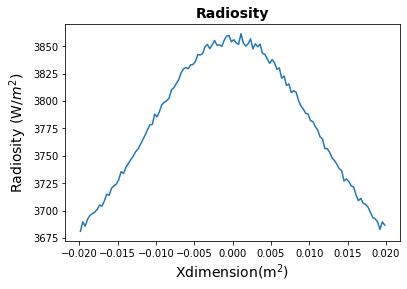

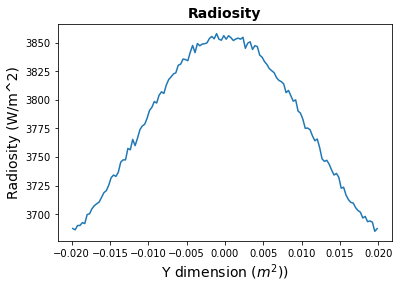

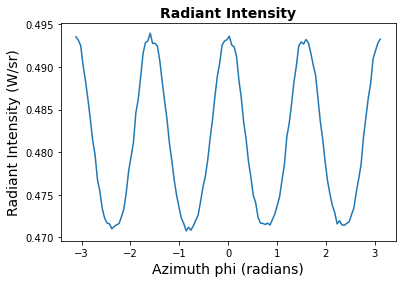

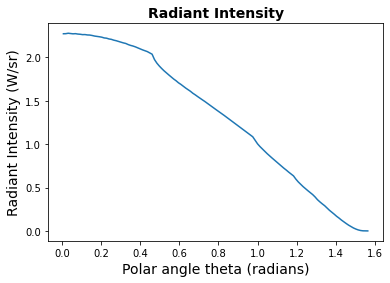

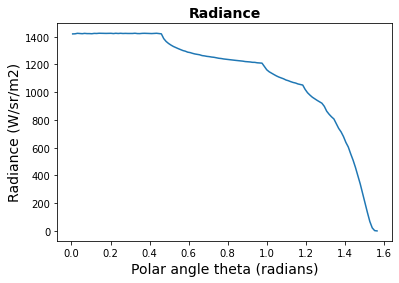

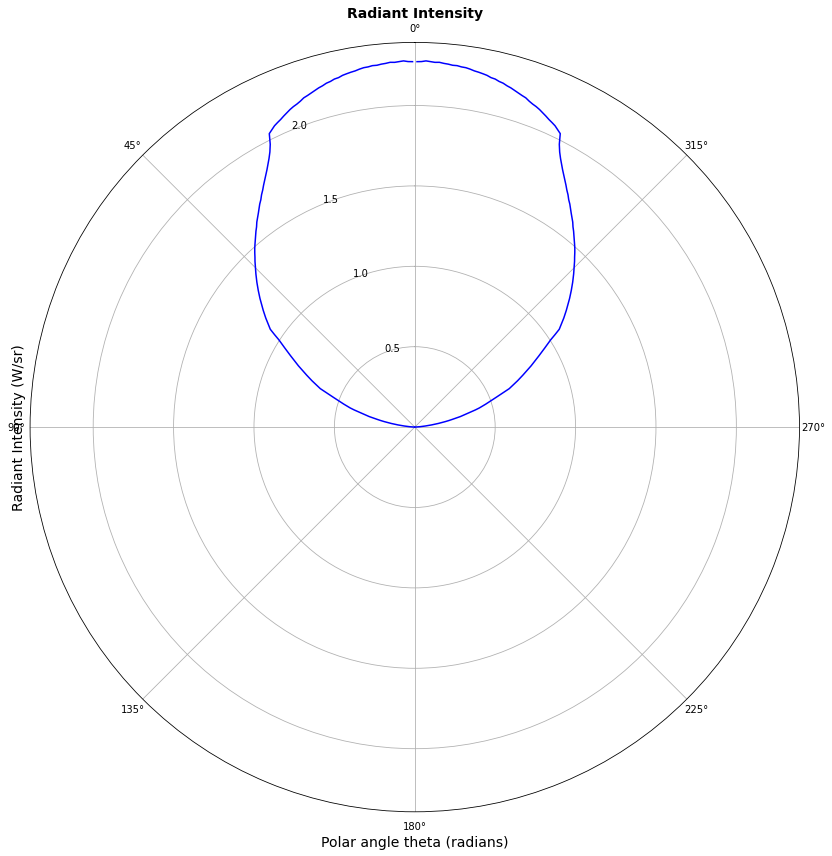

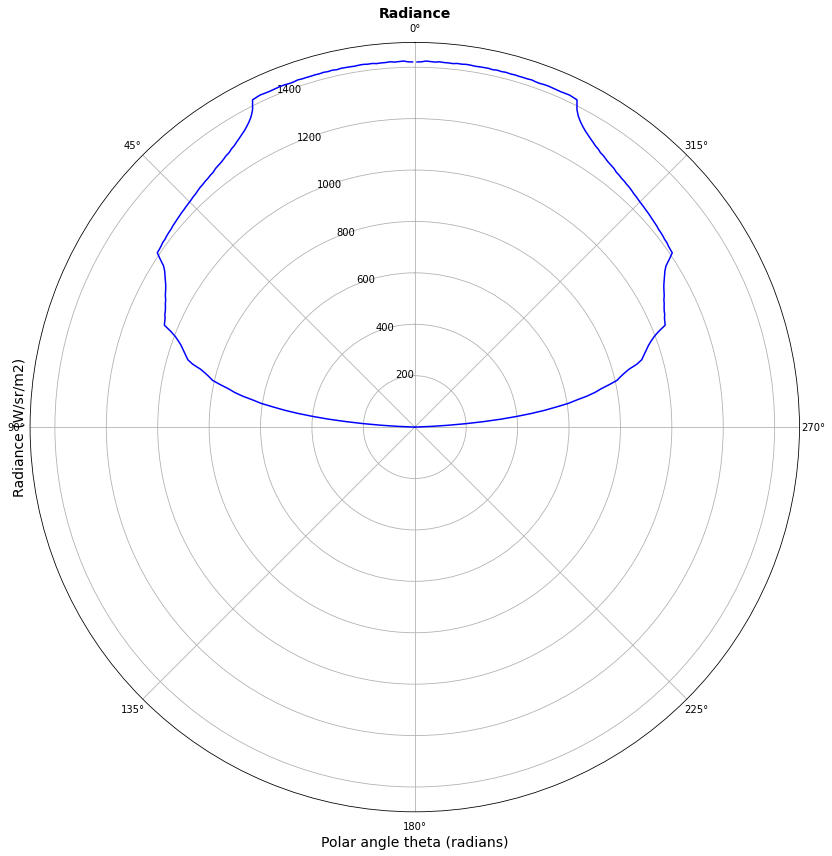

Output()

In [4]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stage_3d(results._box_stage)

diffuser scattered photons: 283901784


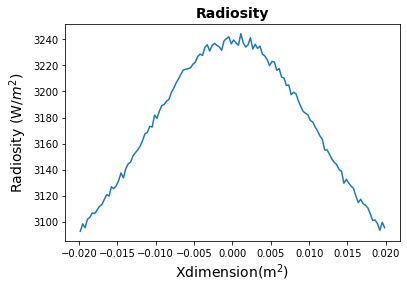

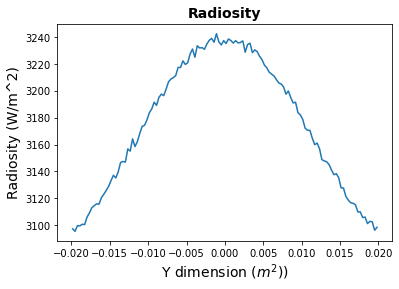

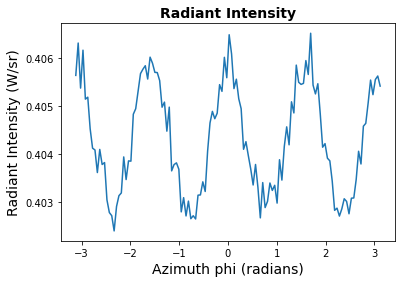

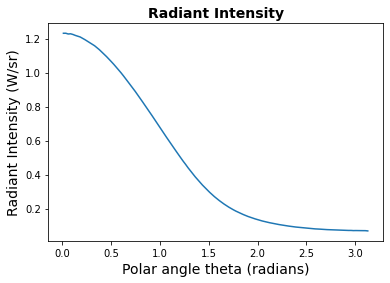

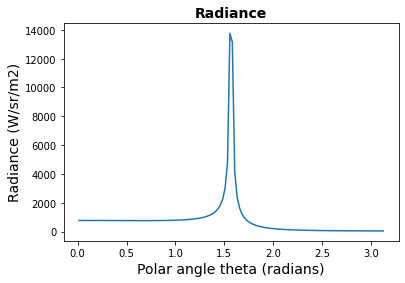

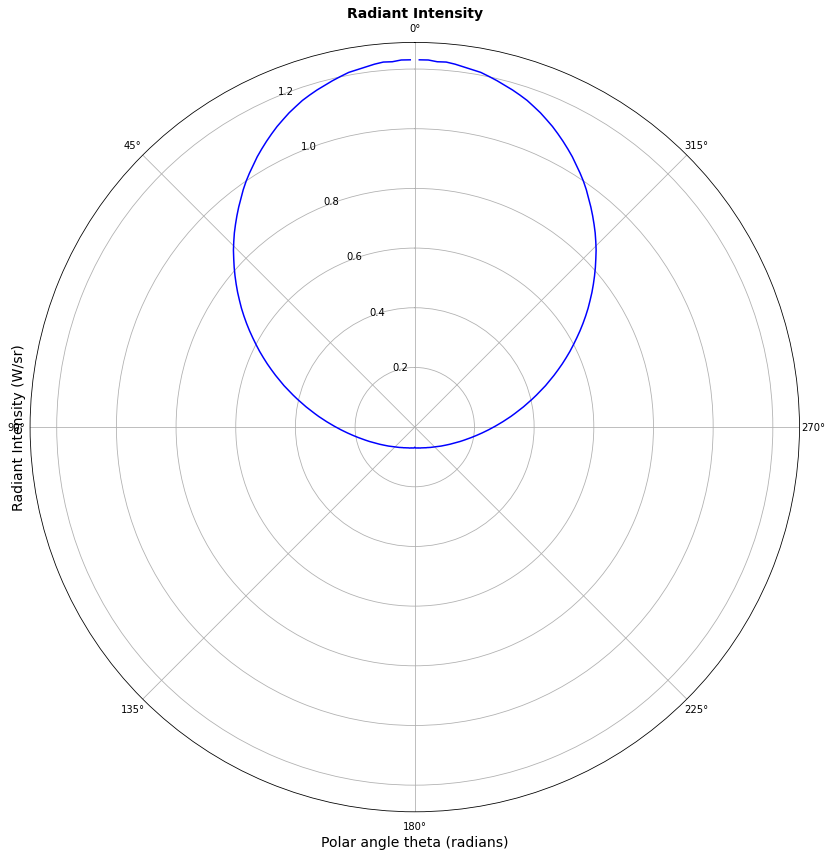

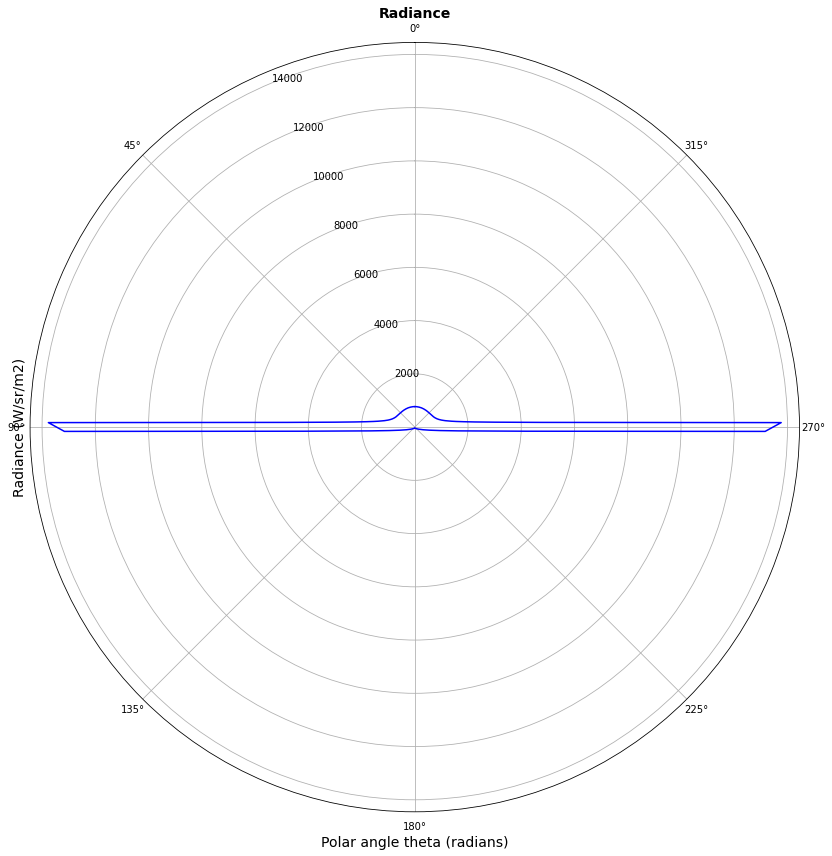

Output()

In [5]:
print(f"diffuser scattered photons: {results._diffuser_stage._photons_size}")
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stage_3d(results._diffuser_stage)

reflector indicent photons: 7012


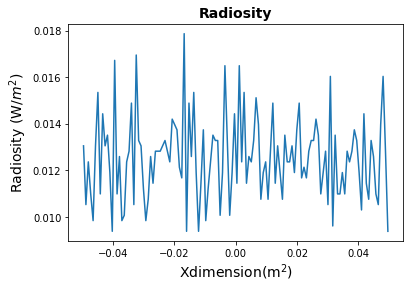

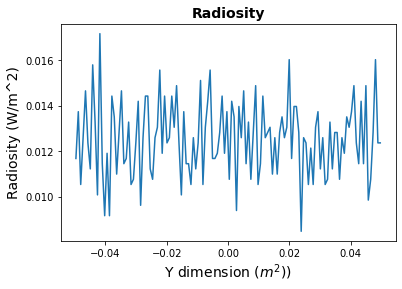

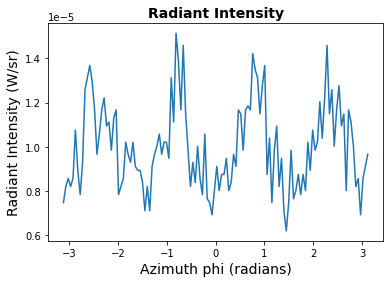

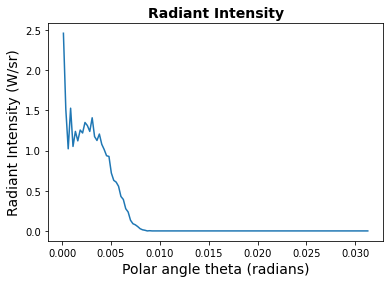

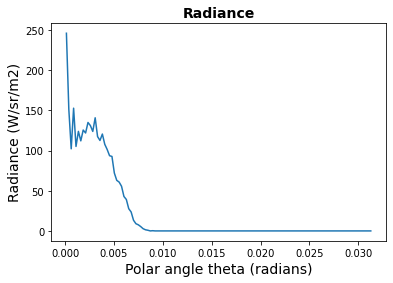

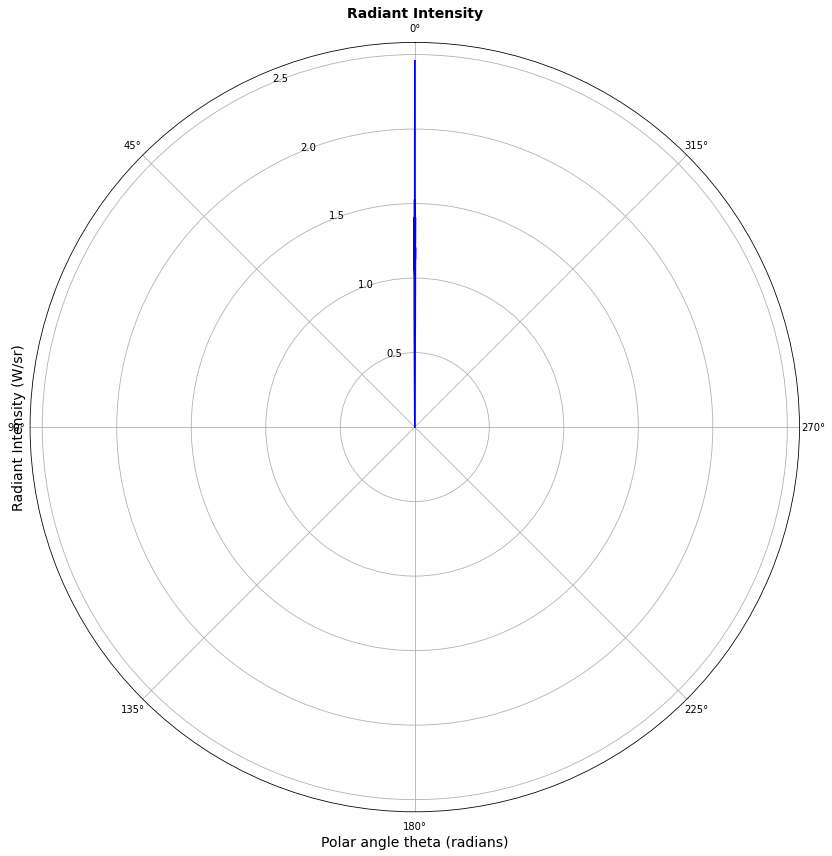

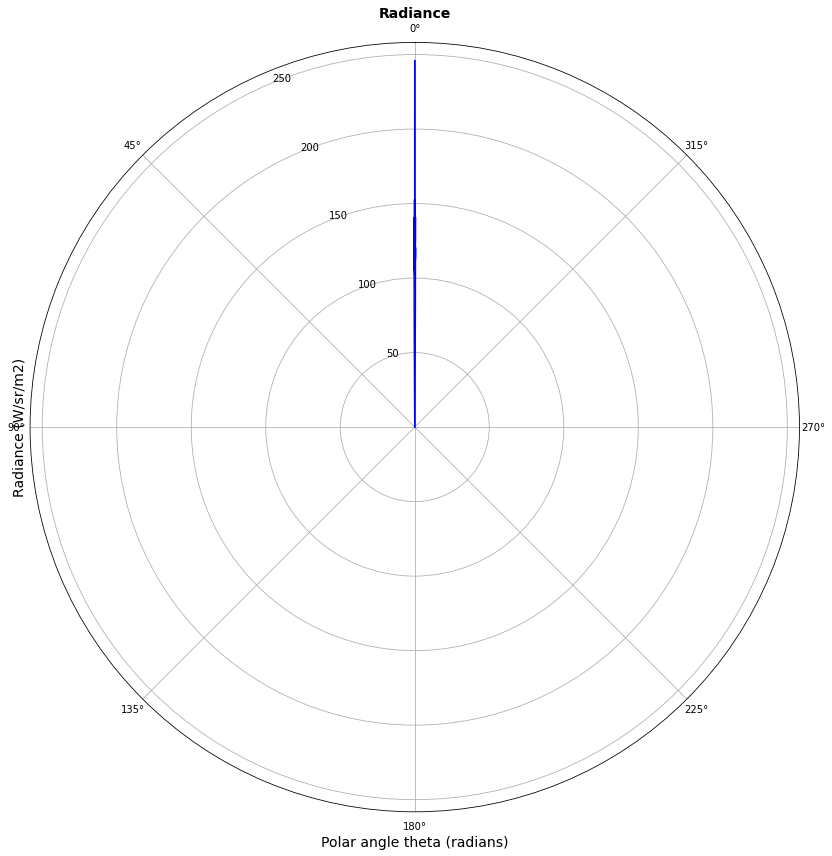

Output()

In [6]:
print(f"reflector indicent photons: {results._outbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stage_3d(results._outbound_stage)

reflected photons: 7012


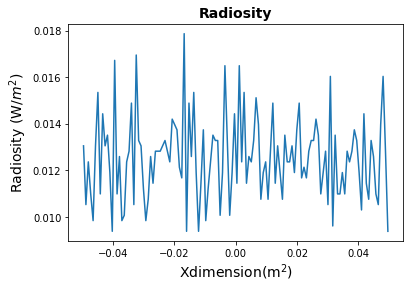

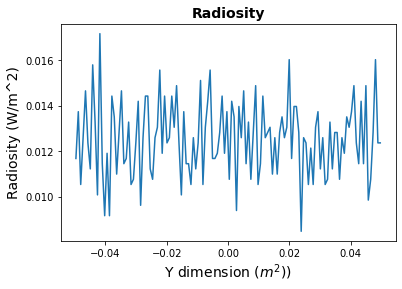

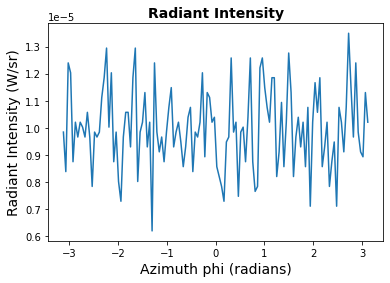

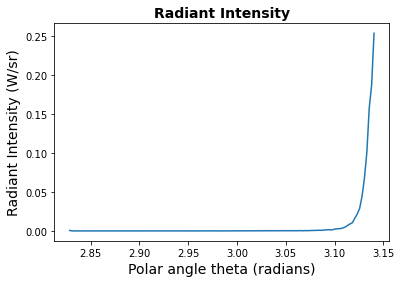

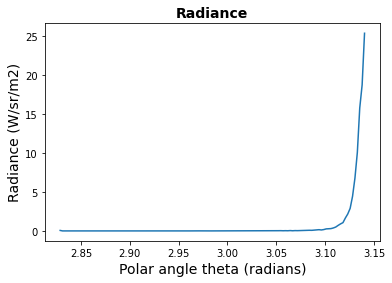

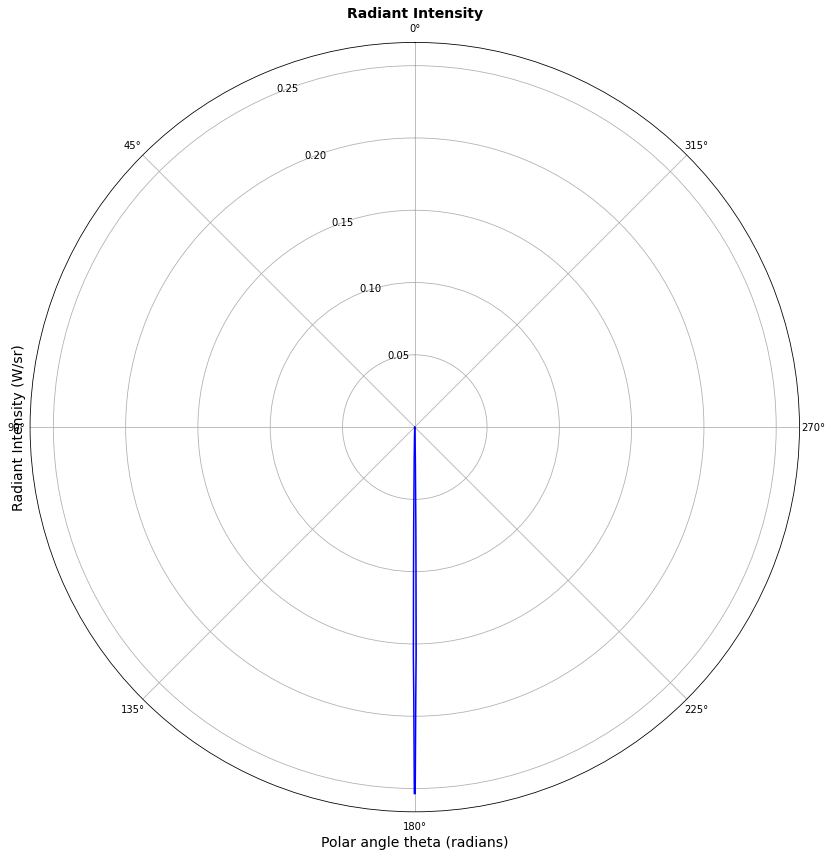

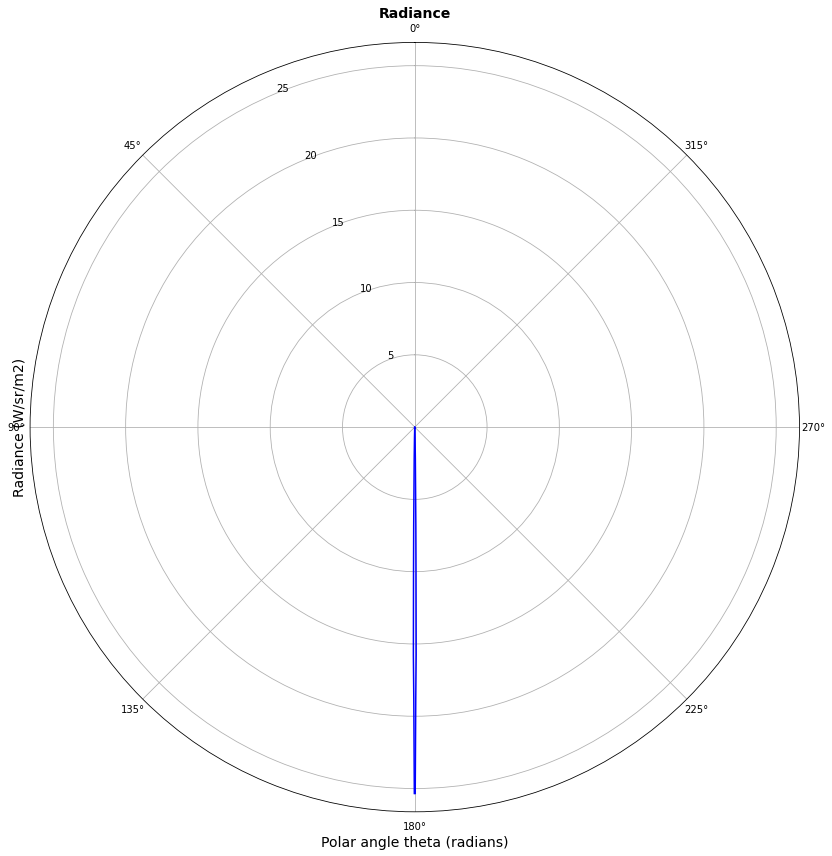

Output()

In [7]:
print(f"reflected photons: {results._inbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stage_3d(results._inbound_stage)

camera plane photons: 3051


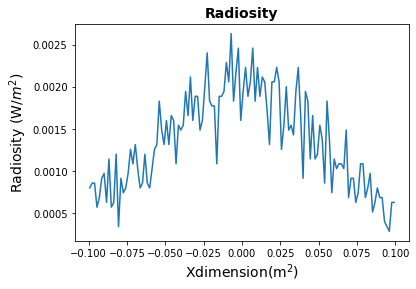

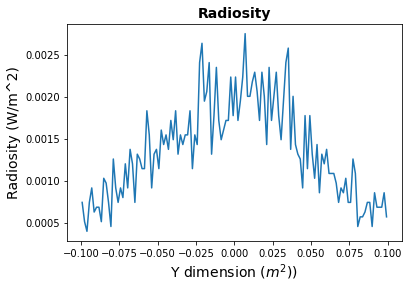

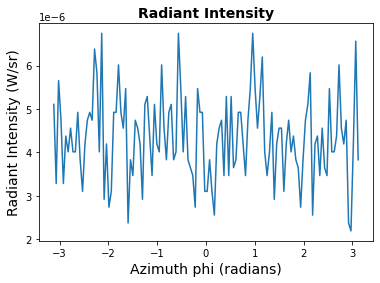

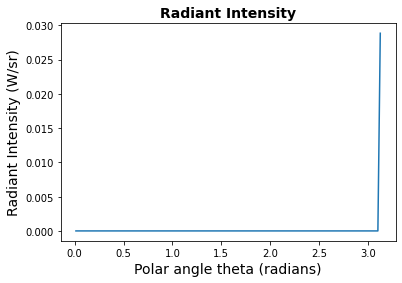

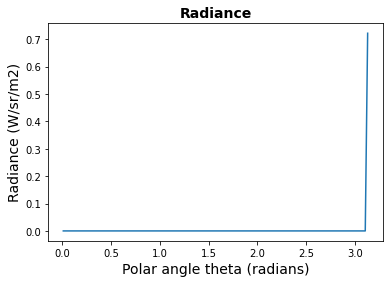

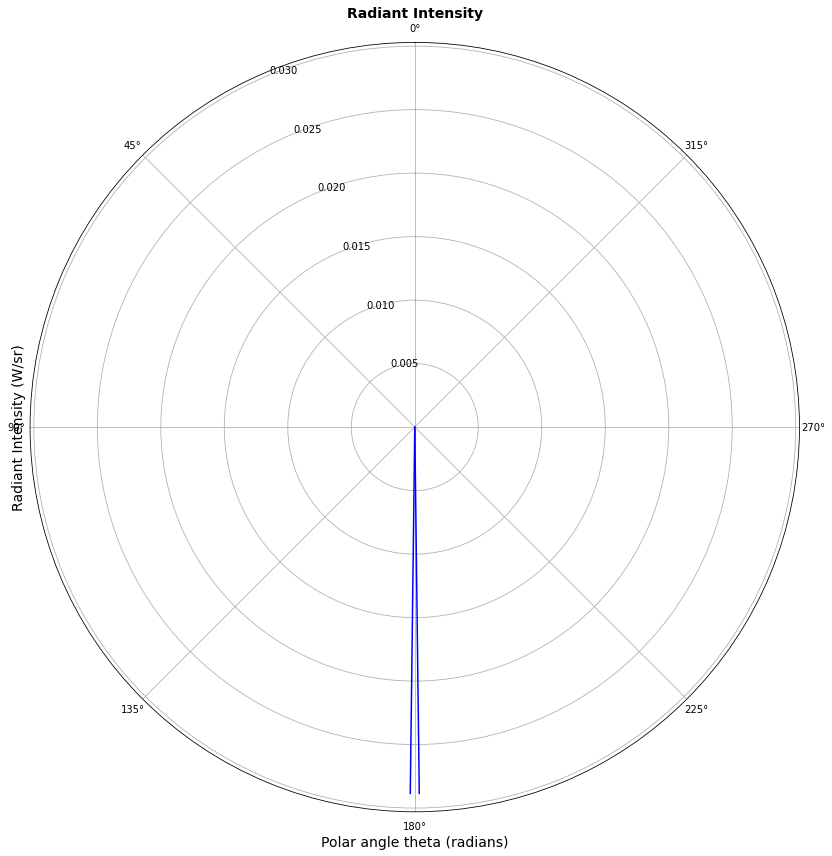

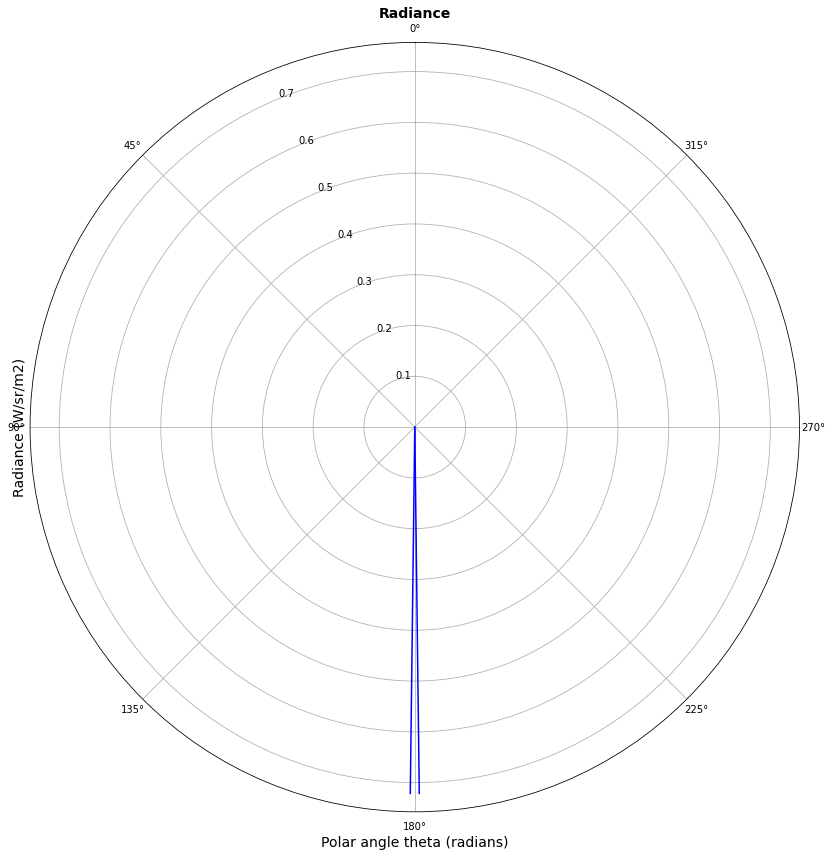

Output()

In [8]:
print(f"camera plane photons: {results._camera_plane_stage._photons_size}")
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stage_3d(results._camera_plane_stage)